In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
a = pd.DataFrame.from_csv('~/Downloads/LoanStats3a_securev1.csv', header=1)
b = pd.DataFrame.from_csv('~/Downloads/LoanStats3b_securev1.csv', header=1)
c = pd.DataFrame.from_csv('~/Downloads/LoanStats3c_securev1.csv', header=1)
d = pd.DataFrame.from_csv('~/Downloads/LoanStats3d_securev1.csv', header=1)

frames = [a,b,c,d]
df = pd.concat(frames)

/Users/claus/venv/lib/python2.7/site-packages/pandas/io/parsers.py:1164: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
/Users/claus/venv/lib/python2.7/site-packages/pandas/io/parsers.py:1164: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [4]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
count,550564.000000,550564.000000,550564.000000,550564.000000,550564.000000,550560.000000,550564.000000,550535.000000,550564.000000,550564.000000,...,550564.000000,550564.000000,550564.000000,550564.000000,550564.000000,550564.000000,550564.000000,550419.000000,123266.000000,550564
mean,18987981.698384,14468.810438,14447.233791,14387.865429,434.153024,73614.203930,17.507829,0.293209,695.501477,699.501553,...,1814.654110,0.361103,31.579304,1.382189,2075.230516,695.856162,686.136752,0.010209,43.115628,1
std,14953301.423221,8321.777232,8311.940605,8332.382346,243.269103,56048.952322,8.001266,0.817007,30.537057,30.537432,...,2000.535056,3.754975,325.258878,46.975098,4616.223209,62.168380,94.417145,0.115192,21.727927,0
min,70473.000000,500.000000,500.000000,0.000000,15.670000,1896.000000,0.000000,0.000000,610.000000,614.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
25%,6047516.500000,8000.000000,8000.000000,8000.000000,258.740000,45000.000000,11.530000,0.000000,670.000000,674.000000,...,555.007500,0.000000,0.000000,0.000000,289.020000,669.000000,665.000000,0.000000,26.000000,1
50%,14719569.000000,12450.000000,12375.000000,12250.000000,381.480000,63000.000000,17.110000,0.000000,690.000000,694.000000,...,1168.820000,0.000000,0.000000,0.000000,467.120000,699.000000,695.000000,0.000000,43.000000,1
75%,32517824.750000,20000.000000,20000.000000,20000.000000,568.910000,89000.000000,23.130000,0.000000,710.000000,714.000000,...,2292.890000,0.000000,0.000000,0.000000,818.157500,734.000000,730.000000,0.000000,60.000000,1
max,47476932.000000,35000.000000,35000.000000,35000.000000,1409.990000,8706582.000000,39.990000,29.000000,845.000000,850.000000,...,21892.310000,306.400000,33520.270000,7002.190000,36475.590000,850.000000,845.000000,20.000000,188.000000,1


##Data cleanup

In [5]:
del df['desc']
del df['mths_since_last_record']

In [6]:
# drop rows with more than 80% NA values
data=df.dropna(axis=1,thresh=df.member_id.count()*.80)

In [7]:
print 'removed:', [c for c in df.columns if not c in data.columns]

removed: ['mths_since_last_delinq', 'next_pymnt_d', 'mths_since_last_major_derog']


## Tag bad loans

In [8]:
bad_indicators = ['Late (16-30 days)', 'Late (31-120 days)', 'Default', 'Charged Off']

In [9]:
# set is_bad indicator to true to loans in status with 'bad' indicators
data.loc[:,'is_bad'] = False
data.loc[data['loan_status'].isin(bad_indicators), 'is_bad'] = True
data.loc[data['loan_status'] =="", 'is_bad'] = np.nan

/Users/claus/venv/lib/python2.7/site-packages/pandas/core/indexing.py:244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/claus/venv/lib/python2.7/site-packages/pandas/core/indexing.py:411: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
# how many bad loans?
print 'Total loans:\t', data.member_id.count()
print 'Bad loans:\t', data[data['is_bad']==True].member_id.count()

Total loans:	550564
Bad loans:	35375


## data type cleanup

In [11]:
data.loc[:,'issue_d'] = pd.to_datetime(data.issue_d)
data.loc[:,'year_issued'] = data.issue_d.dt.year
data.loc[:,'month_issued'] = data.issue_d.dt.month
data.loc[:,'earliest_cr_line'] = pd.to_datetime(data.earliest_cr_line)
data.loc[:,'revol_util'] = data['revol_util'].str.replace("[%]", "").astype(float)
data.home_ownership = data.home_ownership.astype('category')
data.loc[:,'is_rent'] = False
data.loc[data['home_ownership'].isin(['RENT']), 'is_rent'] = True
data.loc[:,'fico_range'] = data.fico_range_high.astype('category')
data.loc[:,'fico_ordered'] = data.fico_range_high.astype('float')

In [12]:
feature_cols = ['is_bad', 'loan_amnt', 'annual_inc', 'fico_range_low', 'fico_range_high', 
                'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 
                'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 
                'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 
                'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 
                'last_fico_range_high', 'last_fico_range_low',
                'is_rent']

### Scaling

In [13]:
from sklearn import preprocessing

# get numeric columns only, _get_numeric_data is private but whatevs
numeric_cols = [c for c in data._get_numeric_data().columns if not c == 'is_bad']
d_feat = data[feature_cols].fillna(0)

In [14]:
# scaler = preprocessing.StandardScaler()
# scaler.fit(d_feat)
# data_scaled = scaler.transform(d_feat)

###Scale numeric columns

In [15]:
for c in d_feat.columns:
    if c in numeric_cols: 
        d_feat.loc[:,c] = (d_feat[c]-d_feat[c].mean())/d_feat[c].std()


### Calc % of bad loans per year & month

In [16]:
def calc_bad_perc(x):
    x['percent_bad'] = x.is_bad.sum()/x.member_id.count()
    return x
d = data.groupby(['year_issued', 'month_issued']).apply(calc_bad_perc)

In [17]:
# pivot columms by is_bad flag 
d2 = pd.melt(d, id_vars="is_bad", value_vars = numeric_cols)

In [18]:
# this kind of blows up, but not critical
# from ggplot import *

# #plot the distribution for bads and goods for each variable
# p = ggplot(aes(x='value', group='is_bad', colour='is_bad'), data=d2)

# p + geom_density() + facet_wrap('variable')

### Get only mature loans to make sure they had enough to be paid off 

In [19]:
data_2012 = d_feat[data['year_issued'] <= 2012]

##Ok, finally some sciency stuff

###Split data into train and test datasets

In [20]:
from sklearn.cross_validation import train_test_split
cols = [c for c in feature_cols if c != 'is_bad']
X = data_2012[cols]
y = data_2012.is_bad


In [ ]:
def run_prediction(X, y, model):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
    print 'X_train\t',X_train.shape
    print 'X_test\t',X_test.shape
    print 'y_train\t',y_train.shape
    print 'y_test\t',y_test.shape
    
    model.fit(X_train, y_train)
    
    print 'Coefficients for each X:'
    print zip(cols, model.coef_[0])
    
    X_test_feat = X_test[cols].fillna(0)
    y_pred = logreg.predict(X_test_feat)

###Let's try some basic logistic regression first

In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)

# logreg.fit(X_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0)

### Coefficients for each X

In [23]:
# zip(cols, logreg.coef_[0])

[('loan_amnt', 4.1478900731415287),
 ('annual_inc', -0.035035743657239139),
 ('fico_range_low', 0.12338816546789819),
 ('fico_range_high', 0.12333111624635743),
 ('inq_last_6mths', -0.58026976746966064),
 ('open_acc', 0.015745594142619723),
 ('pub_rec', 0.047295656558115184),
 ('revol_bal', -0.4159374566420278),
 ('total_acc', 0.29694990250780723),
 ('out_prncp', -2.0616125795291023),
 ('out_prncp_inv', -2.0386135121040017),
 ('total_pymnt', -3.0566519572482207),
 ('total_pymnt_inv', 2.8162052457810463),
 ('total_rec_prncp', -3.7667712266309077),
 ('total_rec_int', 0.34176454555473412),
 ('total_rec_late_fee', 0.10490878603320934),
 ('recoveries', 1.0867314527726084),
 ('collection_recovery_fee', -0.44391477068816582),
 ('last_pymnt_amnt', -2.3290052638807985),
 ('last_fico_range_high', -1.6753917871421007),
 ('last_fico_range_low', 0.12099118557133783),
 ('is_rent', -0.027271983224492122)]

###Predict on the test set

In [24]:
X_test_feat = X_test[cols].fillna(0)
y_pred = logreg.predict(X_test_feat)

In [25]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [26]:
print "Accuracy:\t", (y_test == y_pred).mean()

Accuracy:	0.973932265599


In [27]:
print 'Confusion Matrix', 
cm = metrics.confusion_matrix(y_test, y_pred)
cm

Confusion Matrix

array([[20425,   237],
       [  388,  2926]])

In [28]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Bad', 'Good'], rotation=45)
    plt.yticks(tick_marks, ['Bad', 'Good'])
    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

Confusion matrix, without normalization
[[20425   237]
 [  388  2926]]


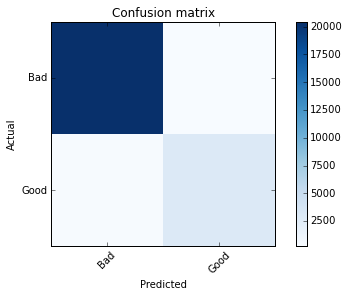

In [29]:
np.set_printoptions(precision=3)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

Normalized confusion matrix
[[ 0.989  0.011]
 [ 0.117  0.883]]


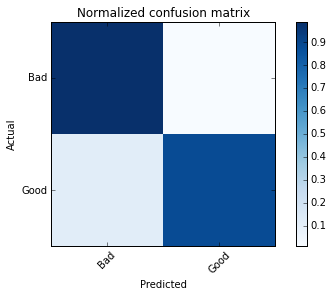

In [30]:
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

In [31]:
print 'MSE\t', metrics.mean_squared_error(y_test, y_pred)
print 'RMSE\t', np.sqrt(metrics.mean_squared_error(y_test, y_pred))

MSE	0.0260677344011
RMSE	0.161455053811


In [32]:
# X_test_feat
print 'Test\t', logreg.score(X_test_feat, y_test)
print 'General\t', logreg.score(X[cols].fillna(0), y)

Test	0.973932265599
General	0.974254968614


###Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
# rf_features = ['last_fico_range_high','last_fico_range_low','pub_rec','revol_util',
#                'inq_last_6mths','is_rent']
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
rf_pred = rf.predict(X_test)

In [35]:
print "Accuracy:\t", (y_test == rf_pred).mean()

Accuracy:	0.98536036036


In [36]:
print 'Confusion Matrix', 
cm = metrics.confusion_matrix(y_test, rf_pred)
cm

Confusion Matrix

array([[20609,    53],
       [  298,  3016]])

Confusion matrix, without normalization
[[20609    53]
 [  298  3016]]


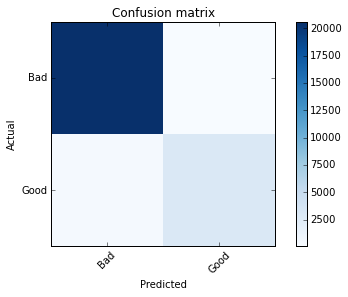

In [37]:
np.set_printoptions(precision=3)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

Normalized confusion matrix
[[ 0.997  0.003]
 [ 0.09   0.91 ]]


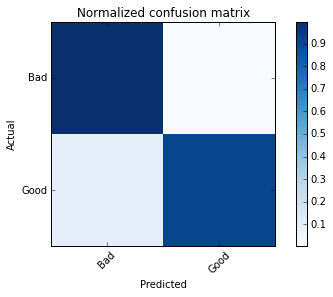

In [38]:
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

###Let's try with PCA 

In [39]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=.98)
X_pca = pca.fit_transform(X)

In [40]:
pca.explained_variance_ratio_.sum()

0.98777035267703939

In [41]:
print 'X\t', X.shape
print 'X_pca\t', X_pca.shape
print  '\t', X_pca.shape[1], 'components needed to explain 98%\t'


X	(95902, 22)
X_pca	(95902, 15)
	15 components needed to explain 98%	


In [44]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, random_state=1)

In [45]:
rf_pca = RandomForestClassifier()
rf_pca.fit(X_pca_train, y_pca_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
rf_pca_pred = rf_pca.predict(X_pca_test)

Normalized confusion matrix
[[ 0.985  0.015]
 [ 0.183  0.817]]


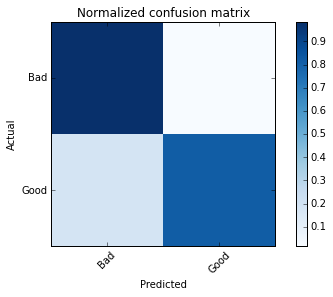

In [48]:
cm_pca = metrics.confusion_matrix(y_pca_test, rf_pca_pred)
cm_pca_normalized = cm_pca.astype('float') / cm_pca.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_pca_normalized)
plt.figure()
plot_confusion_matrix(cm_pca_normalized, title='Normalized confusion matrix')

plt.show()